In [ ]:
import seaborn as sns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Power2.csv to Power2 (1).csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('Power2.csv')  # Dataset - Exo Data
df['Diagnosis'] = df['Diagnosis'].map({
    'Cancer': 1,
    'Healthy': 0
})  # Label values - 1 for Malignant and 0 for Benign
labels = df['Diagnosis'].tolist()
df['Class'] = labels
df.head()  #Displaying first five rows of the dataset

,Diagnosis,F1 = 1.896 Hz,F2 = 2.60699 Hz,F3= 2.72549 Hz,F4 = 0 Hz,F6 = 0.237 Hz,Class
0,1,-33.96365,-37.33893,-38.44475,2.12946,-17.05243,1
1,1,-36.48426,-38.94922,-38.81038,1.54439,-21.00131,1
2,1,-36.48426,-38.94922,-38.81038,1.54439,-21.00131,1
3,1,-30.58541,-34.25155,-33.53224,3.43557,-13.57998,1
4,1,-33.53178,-35.20606,-37.10372,2.43515,-16.24663,1


In [ ]:
target_names = ['','C', 'H']
df['Diagnosis Class'] = df.Class.apply(lambda x: target_names[x])
df.head()

,Diagnosis,F1 = 1.896 Hz,F2 = 2.60699 Hz,F3= 2.72549 Hz,F4 = 0 Hz,F6 = 0.237 Hz,Class,Diagnosis Class
0,1,-33.96365,-37.33893,-38.44475,2.12946,-17.05243,1,C
1,1,-36.48426,-38.94922,-38.81038,1.54439,-21.00131,1,C
2,1,-36.48426,-38.94922,-38.81038,1.54439,-21.00131,1,C
3,1,-30.58541,-34.25155,-33.53224,3.43557,-13.57998,1,C
4,1,-33.53178,-35.20606,-37.10372,2.43515,-16.24663,1,C


In [ ]:
df1 = df[df.Class == 1]
df2 = df[df.Class == 2]

In [ ]:
X = df.drop(['Diagnosis Class','Diagnosis','Class'], axis='columns')
X.head()

,F1 = 1.896 Hz,F2 = 2.60699 Hz,F3= 2.72549 Hz,F4 = 0 Hz,F6 = 0.237 Hz
0,-33.96365,-37.33893,-38.44475,2.12946,-17.05243
1,-36.48426,-38.94922,-38.81038,1.54439,-21.00131
2,-36.48426,-38.94922,-38.81038,1.54439,-21.00131
3,-30.58541,-34.25155,-33.53224,3.43557,-13.57998
4,-33.53178,-35.20606,-37.10372,2.43515,-16.24663


In [ ]:
y = df.Class

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [ ]:
print(len(X_train))
print(len(X_test))

55
55


In [ ]:
model = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False)

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1]


In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
res = confusion_matrix(y_test, predictions)
print("Confusion Matrix")
print(res)
print(f"Test Set: {len(X_test)}")
print(f"Accuracy = {percentage*100} %")

Confusion Matrix
[[ 6 14]
 [ 7 28]]
Test Set: 55
Accuracy = 61.81818181818181 %


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.46      0.30      0.36        20
           1       0.67      0.80      0.73        35

    accuracy                           0.62        55
   macro avg       0.56      0.55      0.55        55
weighted avg       0.59      0.62      0.60        55



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
roc_curve(y_test, predictions, pos_label=1, sample_weight=None, drop_intermediate=True)

(array([0. , 0.7, 1. ]), array([0. , 0.8, 1. ]), array([2, 1, 0]))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


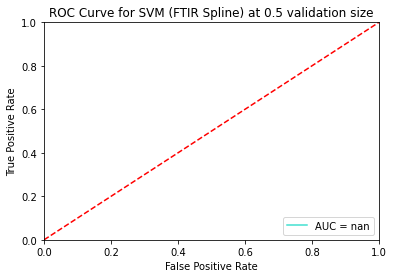

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
estimator = SVC(probability=True)
probs = estimator.fit(X_train, y_train).predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions, pos_label = 2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve for SVM (FTIR Spline) at 0.5 validation size')
plt.plot(fpr, tpr, 'turquoise', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
from sklearn.model_selection import cross_val_score
>>> clf = SVC(kernel='linear', C=1)
>>> scores = cross_val_score(clf, X, y, cv=10)
>>> scores



array([0.63636364, 0.18181818, 0.54545455, 0.72727273, 0.81818182,
       0.63636364, 0.63636364, 0.90909091, 0.72727273, 0.72727273])

In [44]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator = clf, X= X_train, y= y_train, cv=10)
print("Accuracy:{:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation:{:.2f}%".format(accuracies.std()*100))


Accuracy:69.33%
Standard Deviation:7.42%


In [43]:
scores.mean() 

0.6545454545454545

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

In [ ]:
from sklearn.model_selection import learning_curve #learningcurves
>>> from sklearn.svm import SVC

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
...     SVC(kernel='linear'), X, y, train_sizes=(11,), cv=5)

In [ ]:
train_sizes

array([11])

In [ ]:
train_scores

array([[0.54545455, 0.54545455, 0.54545455, 0.63636364, 0.63636364]])

In [ ]:
valid_scores

array([[0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.5       ]])

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
...     SVC(kernel='linear'), X, y, # Number of folds in cross-validation
                                                        cv=2,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 7 instead of 50).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


In [ ]:
train_mean = np.mean(train_scores, axis=1)# Create means and standard deviations of training set scores
train_std = np.std(train_scores, axis=1)

In [ ]:
test_mean = np.mean(test_scores, axis=1) # Create means and standard deviations of test set scores
test_std = np.std(test_scores, axis=1)

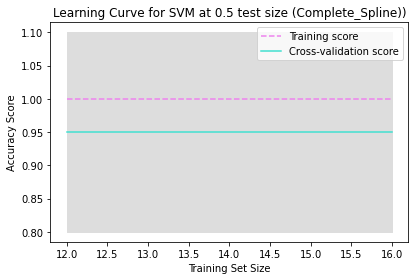

In [ ]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="violet",  label="Training score")
plt.plot(train_sizes, test_mean, color="turquoise", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve for SVM at 0.5 test size (Complete_Spline))")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve